In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Cargar el dataset de vino
columns = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium',
           'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
           'Color_Intensity', 'Hue', 'OD280/OD315', 'Proline']
wine_df = pd.read_csv('wine.data', header=None, names=columns)

In [17]:
# Definir las características relevantes y no relevantes
X_relevant = wine_df[['Alcohol']]
X_not_relevant = wine_df[['Ash']]
y = wine_df['Class']

In [18]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train_relevant, X_test_relevant, y_train, y_test = train_test_split(X_relevant, y, test_size=0.2, random_state=42)
X_train_not_relevant, X_test_not_relevant, _, _ = train_test_split(X_not_relevant, y, test_size=0.2, random_state=42)


In [19]:
# Escalar los datos
scaler = StandardScaler()
X_train_relevant = scaler.fit_transform(X_train_relevant)
X_test_relevant = scaler.transform(X_test_relevant)
X_train_not_relevant = scaler.fit_transform(X_train_not_relevant)
X_test_not_relevant = scaler.transform(X_test_not_relevant)

In [20]:
# Crear y entrenar los modelos de regresión logística
model_relevant = LogisticRegression(max_iter=1000)
model_not_relevant = LogisticRegression(max_iter=1000)

model_relevant.fit(X_train_relevant, y_train)
model_not_relevant.fit(X_train_not_relevant, y_train)

LogisticRegression(max_iter=1000)

In [21]:
# Predicciones
y_pred_relevant = model_relevant.predict(X_test_relevant)
y_pred_not_relevant = model_not_relevant.predict(X_test_not_relevant)

In [22]:
# Calcular las matrices de confusión y F1-score
cm_relevant = confusion_matrix(y_test, y_pred_relevant)
cm_not_relevant = confusion_matrix(y_test, y_pred_not_relevant)

f1_relevant = f1_score(y_test, y_pred_relevant, average='weighted')
f1_not_relevant = f1_score(y_test, y_pred_not_relevant, average='weighted')

print("Confusion Matrix (Relevant):\n", cm_relevant)
print("F1 Score (Relevant):", f1_relevant)
print("\nConfusion Matrix (Not Relevant):\n", cm_not_relevant)
print("F1 Score (Not Relevant):", f1_not_relevant)

Confusion Matrix (Relevant):
 [[14  0  0]
 [ 0 13  1]
 [ 5  1  2]]
F1 Score (Relevant): 0.7718855218855218

Confusion Matrix (Not Relevant):
 [[9 5 0]
 [5 9 0]
 [4 4 0]]
F1 Score (Not Relevant): 0.4375000000000001


In [23]:
# Añadir características combinadas (Alcohol, Ash) y sus cuadrados
X_combined = wine_df[['Alcohol', 'Ash']]
X_combined['Alcohol_squared'] = wine_df['Alcohol'] ** 2
X_combined['Ash_squared'] = wine_df['Ash'] ** 2

<ipython-input-23-c906e822f105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_combined['Alcohol_squared'] = wine_df['Alcohol'] ** 2
<ipython-input-23-c906e822f105>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_combined['Ash_squared'] = wine_df['Ash'] ** 2


In [24]:
# Dividir el conjunto de datos combinado en entrenamiento y prueba
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Escalar las características combinadas
X_train_combined = scaler.fit_transform(X_train_combined)
X_test_combined = scaler.transform(X_test_combined)

In [25]:
# Crear y entrenar el modelo con las características combinadas
model_combined = LogisticRegression(max_iter=100)
model_combined.fit(X_train_combined, y_train_combined)

LogisticRegression()

In [26]:
# Predicciones del modelo combinado
y_pred_combined = model_combined.predict(X_test_combined)

In [27]:
# Calcular la matriz de confusión y F1-score para el modelo combinado
cm_combined = confusion_matrix(y_test_combined, y_pred_combined)
f1_combined = f1_score(y_test_combined, y_pred_combined, average='weighted')

print("\nConfusion Matrix (Combined):\n", cm_combined)
print("F1 Score (Combined):", f1_combined)


Confusion Matrix (Combined):
 [[13  0  1]
 [ 0 14  0]
 [ 4  1  3]]
F1 Score (Combined): 0.8127549128661475


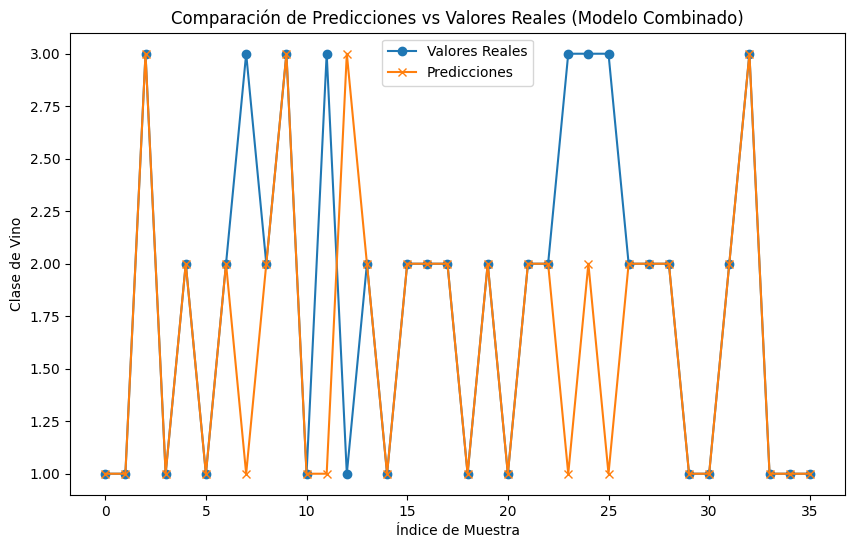

In [30]:
# Gráfica de comparación entre las predicciones y los datos reales para el modelo combinado
x_axis = np.arange(len(y_test_combined))  # Eje x para las muestras de prueba
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_test_combined, label="Valores Reales", marker='o')
plt.plot(x_axis, y_pred_combined, label="Predicciones", marker='x')
plt.xlabel("Índice de Muestra")
plt.ylabel("Clase de Vino")
plt.title("Comparación de Predicciones vs Valores Reales (Modelo Combinado)")
plt.legend()
plt.show()